In [12]:
# %% [1] Configuração Inicial
import fastf1 as ff1
import matplotlib.pyplot as plt
from fastf1.plotting import get_team_color
import pandas as pd

In [13]:
# %% [2] Carrega dados do GP do Brasil 2023 (exemplo)
session = ff1.get_session(2021, 'Brazil', 'R')
session.load()
laps = session.laps

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', '7', '63', '99', '22', '6', '9', '47', '3', '18']


In [14]:
# %% [3] Filtra voltas de dois pilotos para comparação
piloto1 = 'VER'  # Verstappen
piloto2 = 'HAM'  # Hamilton

laps_piloto1 = laps.pick_drivers(piloto1).reset_index()
laps_piloto2 = laps.pick_drivers(piloto2).reset_index()

In [15]:
# %% [4] Filtra apenas voltas com pneus SOFT (exemplo)
soft_p1 = laps_piloto1[laps_piloto1['Compound'] == 'HARD']
soft_p2 = laps_piloto2[laps_piloto2['Compound'] == 'HARD']

req            INFO 	Using cached data for driver_info


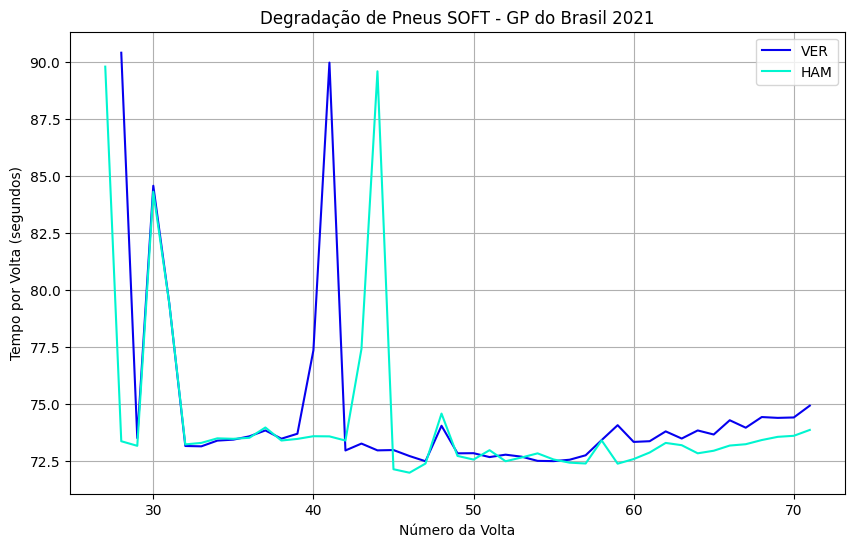

In [16]:
# %% [5] Plotagem comparativa

redbull_color = ff1.plotting.get_team_color('Red Bull', session)
mercedes_color = ff1.plotting.get_team_color('Mercedes', session)

plt.figure(figsize=(10, 6))
plt.plot(soft_p1['LapNumber'], soft_p1['LapTime'].dt.total_seconds(), color=redbull_color, label=piloto1)
plt.plot(soft_p2['LapNumber'], soft_p2['LapTime'].dt.total_seconds(), color=mercedes_color, label=piloto2)
plt.title(f"Degradação de Pneus SOFT - GP do Brasil 2021")
plt.xlabel("Número da Volta")
plt.ylabel("Tempo por Volta (segundos)")
plt.legend()
plt.grid()
plt.show()

In [17]:
# %% [6] Análise estatística 
degradacao_p1 = (soft_p1['LapTime'].dt.total_seconds().max() - 
                 soft_p1['LapTime'].dt.total_seconds().min())
degradacao_p2 = (soft_p2['LapTime'].dt.total_seconds().max() - 
                 soft_p2['LapTime'].dt.total_seconds().min())

print(f"Degradação total (segundos): {piloto1}={degradacao_p1:.2f}s | {piloto2}={degradacao_p2:.2f}s")

Degradação total (segundos): VER=17.93s | HAM=17.82s
